In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
os.chdir('C:/Storage/StudyJourney/Nam3/Cs114/Project2/PredictScores')

In [42]:
# Đọc dữ liệu
annonimized = pd.read_csv("Dataset/annonimized.csv")
tbtl = pd.read_excel("Dataset/public_it001/tbtl-public.ods", engine='odf')
th = pd.read_csv("Dataset/public_it001/th-public.csv")
qt = pd.read_csv("Dataset/public_it001/qt-public.csv")
CK = pd.read_csv("Dataset/public_it001/ck-public.csv")

## Xử lý dữ liệu annonimized

In [43]:
annonimized

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:02,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:04,10/9/2025 8:04,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:06,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:47,10/9/2025 8:48,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 9:19,10/9/2025 9:19,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:03,1/15/2025 16:03,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:05,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [44]:
print(annonimized['status'].unique())

['SCORE' 'Compilation Error' 'pending' 'Syntax Error']


In [45]:
# Hàm xử lý cột `judgement` để rút trích các đặc trưng
import json

def extract_judgement_features(df):
    # Parse cột judgement thành dict với kiểm tra ngoại lệ
    def safe_json_loads(j):
        try:
            return json.loads(j) if isinstance(j, str) else {}
        except json.JSONDecodeError:
            return {}

    # Chuyển cột judgement sang dạng dict
    df['judgement_parsed'] = df['judgement'].apply(safe_json_loads)
    
    # Rút trích các giá trị từ judgement
    df['times'] = df['judgement_parsed'].apply(lambda x: x.get('times', []) if isinstance(x, dict) else [])
    df['mems'] = df['judgement_parsed'].apply(lambda x: x.get('mems', []) if isinstance(x, dict) else [])
    
    # Kiểm tra kiểu của verdicts và xử lý
    def extract_verdicts(verdicts):
        if isinstance(verdicts, dict):
            return verdicts.get('WRONG', 0)
        return 0  # Mặc định nếu verdicts không phải là dict

    df['verdicts'] = df['judgement_parsed'].apply(lambda x: x.get('verdicts', {}) if isinstance(x, dict) else {})
    df['wrong_testcases'] = df['verdicts'].apply(extract_verdicts)
    df['accepted'] = df['verdicts'].apply(lambda x: 1 if isinstance(x, list) else -1)

    return df

def process_times_and_mems(df):
    df['times_mean'] = df['times'].apply(lambda x: sum(x) / len(x) if x else -1)
    df['mems_mean'] = df['mems'].apply(lambda x: sum(x) / len(x) if x else -1)
    return df

In [46]:
from datetime import datetime
from scipy import stats




# Hàm chuyển đổi thời gian với ngày tham chiếu
reference_date = datetime(2024, 1, 1)

# Chuyển đổi 'created_at' và 'updated_at' thành ordinal và thêm đặc trưng chênh lệch ngày
annonimized['created_at'] = pd.to_datetime(annonimized['created_at'], errors='coerce')
annonimized['updated_at'] = pd.to_datetime(annonimized['updated_at'], errors='coerce')
annonimized['created_at_ordinal'] = (annonimized['created_at'] - reference_date).dt.days
annonimized['updated_at_ordinal'] = (annonimized['updated_at'] - reference_date).dt.days
annonimized['duration'] = (annonimized['updated_at'] - annonimized['created_at']).dt.total_seconds()

# Z-score và kiểm tra ngoại lệ
# annonimized['z_score'] = stats.zscore(annonimized['pre_score'])
# annonimized['is_outlier'] = annonimized['z_score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Đặc trưng hoạt động theo giờ
annonimized['hour'] = annonimized['created_at'].dt.hour
# annonimized = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['hour'].value_counts().unstack(fill_value=0).reset_index()

# Label encoding cho cột 'status'
label_encoder = LabelEncoder()

# Thêm các đặc trưng tổng hợp
annonimized['submission_time_diff'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['created_at'].diff().dt.total_seconds()

annonimized['status_encoded'] = label_encoder.fit_transform(annonimized['status'])

annonimized['submission_count'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['is_final'].transform('count')

annonimized['avg_pre_score'] = annonimized.groupby('username')['pre_score'].transform('mean')

annonimized['score_per_submission'] = annonimized['avg_pre_score'] / (annonimized['submission_count'] + 1e-5)  # Tránh chia cho 0

# Tính số lần nộp có status == "SCORE"
annonimized['is_final'] = (annonimized['status'] == 'SCORE').astype(int)

# Số lần có 'SCORE' của mỗi user trên mỗi bài tập
annonimized['score_count'] = annonimized.groupby(['username', 'assignment_id', 'problem_id'])['is_final'].transform('sum')

# Tính tỉ lệ hoàn thành (số lần 'SCORE' / tổng số lần nộp)
annonimized['is_final_ratio'] = annonimized['score_count'] / (annonimized['submission_count'] + 1e-5)  # Tránh chia 0

annonimized = extract_judgement_features(annonimized)
annonimized = process_times_and_mems(annonimized)

annonimized = annonimized.groupby('username').agg({
    'status_encoded': 'mean',
    'is_final_ratio': 'mean',
    'submission_time_diff': 'mean',
    'wrong_testcases': 'mean',
    'accepted': 'mean',
    # 'created_at_ordinal': 'mean',
    # 'updated_at_ordinal': 'mean',
    'duration': 'mean',
    'hour': 'mean',
    # 'z_score': 'mean',
    # 'is_outlier': 'mean',
    'submission_count': 'mean',
    'avg_pre_score': 'mean',
    'score_per_submission': 'mean',
    'is_final_ratio': 'mean',
    # 'error_rate': 'mean',
    # 'times_mean': 'mean',
    # 'mems_mean': 'mean',
    # 'ratio_in_assignment': 'mean'
}).reset_index()

# Nhóm và tổng hợp các đặc trưng
# features = ['username', 'status_encoded', 'is_final', 'submission_count', 'avg_pre_score', 
#             'score_per_submission', 'is_final_ratio',
#             'submission_time_diff', 'problem_final_ratio', 'wrong_testcases', 
#             'accepted', 'created_at_ordinal', 'updated_at_ordinal', 
#             'hour', 'problem_submission_count']

# features_nouser = ['status_encoded', 'is_final', 'submission_count', 'avg_pre_score', 
#             'score_per_submission', 'is_final_ratio',
#             'submission_time_diff', 'problem_final_ratio', 'wrong_testcases', 
#             'accepted', 'created_at_ordinal', 'updated_at_ordinal', 
#             'hour', 'problem_submission_count']

features = ['username', 'status_encoded', 'is_final_ratio', 
            'wrong_testcases', 'accepted', 'duration', 'hour', 'submission_count', 
            'avg_pre_score', 'score_per_submission', 'is_final_ratio']

features_nouser = ['status_encoded', 'is_final_ratio', 
            'wrong_testcases', 'accepted', 'duration', 'hour', 'submission_count', 
            'avg_pre_score', 'score_per_submission', 'is_final_ratio']

annonimized = annonimized[features]


In [47]:
# Loại bỏ các cột không cần thiết
# annonimized = annonimized.drop(columns = ['created_at', 'updated_at', 'language_id'])

In [48]:
print(annonimized.dtypes)

username                 object
status_encoded          float64
is_final_ratio          float64
wrong_testcases         float64
accepted                float64
duration                float64
hour                    float64
submission_count        float64
avg_pre_score           float64
score_per_submission    float64
is_final_ratio          float64
dtype: object


In [49]:
annonimized

,username,status_encoded,is_final_ratio,wrong_testcases,accepted,duration,hour,submission_count,avg_pre_score,score_per_submission,is_final_ratio
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0.809524,0.809521,3.006803,-0.265306,8197.142857,4.401361,5.136054,5504.149660,1759.820393,0.809521
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,0.806950,0.806947,1.918919,-0.343629,-232304.942085,10.525097,6.158301,5488.552124,1652.913990,0.806947
2,01122b3ef7e59b84189e65985305f575d6bdf83c,0.897436,0.897433,4.615385,-0.394872,-103018.461538,10.964103,9.328205,5973.753846,2083.139650,0.897433
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,0.760000,0.759996,1.640000,0.040000,1512.000000,8.610000,4.160000,5952.760000,2797.776791,0.759996
4,013de369c439ab0ead8aa7da64423aa395a8be39,0.878505,0.878499,1.691589,0.102804,181.682243,8.598131,2.794393,6474.448598,3993.551830,0.878499
...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,0.959459,0.959455,0.432432,0.081081,193.783784,9.351351,3.783784,5581.081081,2564.262048,0.959455
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,0.830769,0.830766,2.430769,-0.384615,9762.461538,7.046154,7.384615,6204.557692,1861.355694,0.830766
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,0.823799,0.823797,3.073227,-0.519451,-112286.086957,11.080092,12.643021,4998.466819,1178.121378,0.823797
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,0.787234,0.787231,4.212766,-0.361702,9669.574468,10.691489,4.808511,4343.329787,1570.982082,0.787231


In [50]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'xgb_model' : xgb.XGBRegressor(n_estimators=130, learning_rate=0.1, max_depQT=10, random_state=42),
    # 'gbr_model' : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'lgbm': LGBMRegressor(random_state=42),
    # # 'cb': CatBoostRegressor(verbose=0, random_state=42),
    # 'hist_gbr': HistGradientBoostingRegressor(random_state=42)
}

## data TBTL

In [51]:
# Merge dữ liệu bằng username từ annonimized và tbtl
data_tbtl = annonimized.merge(tbtl, on="username", how="left")

In [52]:
data_tbtl['TBTL'] = data_tbtl.groupby('username')['TBTL'].mean().values

In [53]:
# Phân tách dữ liệu
train_test_data_tbtl = data_tbtl[data_tbtl['TBTL'].notna()]  # Sinh viên có điểm dùng để train
predict_data_tbtl = data_tbtl[data_tbtl['TBTL'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_tbtl.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_tbtl.shape[0]}")

Số lượng sinh viên có điểm (train): 799
Số lượng sinh viên cần dự đoán: 690


### Train test data tbtl

In [54]:
X_train_test_data_tbtl = train_test_data_tbtl[features_nouser]
y_train_test_data_tbtl = train_test_data_tbtl['TBTL']

In [55]:
nan_columns = X_train_test_data_tbtl.columns[X_train_test_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [56]:
X_train_test_data_tbtl

,status_encoded,is_final_ratio,is_final_ratio,wrong_testcases,accepted,duration,hour,submission_count,avg_pre_score,score_per_submission,is_final_ratio,is_final_ratio
0,0.809524,0.809521,0.809521,3.006803,-0.265306,8197.142857,4.401361,5.136054,5504.149660,1759.820393,0.809521,0.809521
1,0.806950,0.806947,0.806947,1.918919,-0.343629,-232304.942085,10.525097,6.158301,5488.552124,1652.913990,0.806947,0.806947
2,0.897436,0.897433,0.897433,4.615385,-0.394872,-103018.461538,10.964103,9.328205,5973.753846,2083.139650,0.897433,0.897433
3,0.760000,0.759996,0.759996,1.640000,0.040000,1512.000000,8.610000,4.160000,5952.760000,2797.776791,0.759996,0.759996
4,0.878505,0.878499,0.878499,1.691589,0.102804,181.682243,8.598131,2.794393,6474.448598,3993.551830,0.878499,0.878499
...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.729730,0.729726,0.729726,2.225225,-0.261261,26850.270270,10.063063,4.135135,5171.639640,2096.596730,0.729726,0.729726
797,0.711485,0.711482,0.711482,2.316527,-0.394958,-116640.168067,10.151261,6.394958,4785.224090,1394.007023,0.711482,0.711482
798,0.754839,0.754836,0.754836,3.206452,-0.393548,45864.000000,8.225806,8.819355,4247.296774,1452.290790,0.754836,0.754836
799,0.746858,0.746856,0.746856,3.427289,-0.594255,-47822.585278,7.561939,10.188510,4278.605027,883.370429,0.746856,0.746856


In [57]:
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
# X_train_test_data_tbtl = scaler.fit_transform(X_train_test_data_tbtl)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_tbtl, y_train_test_data_tbtl, test_size=0.3, random_state=42)

In [58]:
X_train

,status_encoded,is_final_ratio,is_final_ratio,wrong_testcases,accepted,duration,hour,submission_count,avg_pre_score,score_per_submission,is_final_ratio,is_final_ratio
405,0.770115,0.770111,0.770111,2.022989,-0.164751,29932.413793,8.475096,4.463602,5779.333333,2480.003369,0.770111,0.770111
523,0.797980,0.797977,0.797977,2.383838,-0.212121,2310.000000,11.313131,6.131313,5448.974747,1898.873215,0.797977,0.797977
750,0.699115,0.699111,0.699111,4.070796,-0.610619,7323.185841,10.831858,3.230088,2888.132743,1456.835607,0.699111,0.699111
427,0.920354,0.920350,0.920350,2.778761,-0.123894,33366.106195,9.207965,5.389381,6430.331858,2788.353070,0.920350,0.920350
41,0.743902,0.743900,0.743900,3.048780,-0.439024,8880.243902,9.093496,8.934959,4425.292683,1151.289223,0.743900,0.743900
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.740000,0.739996,0.739996,1.970000,-0.050000,-409158.000000,12.470000,3.130000,5469.190000,2761.921235,0.739996,0.739996
106,0.803681,0.803678,0.803678,2.883436,-0.325153,4149.938650,8.355828,6.656442,5293.950920,1623.901401,0.803678,0.803678
270,0.807771,0.807769,0.807769,3.347648,-0.415133,-53192.269939,9.867076,9.678937,4677.613497,1272.226388,0.807769,0.807769
436,0.677019,0.677017,0.677017,4.826087,-0.751553,8502.111801,9.987578,9.322981,2112.559006,446.128601,0.677017,0.677017


In [59]:
y_train 

405    7.71
523    7.50
750    7.74
427    8.04
41     8.63
       ... 
71     7.11
106    7.93
270    9.15
436    7.32
102    8.10
Name: TBTL, Length: 559, dtype: float64

In [60]:

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

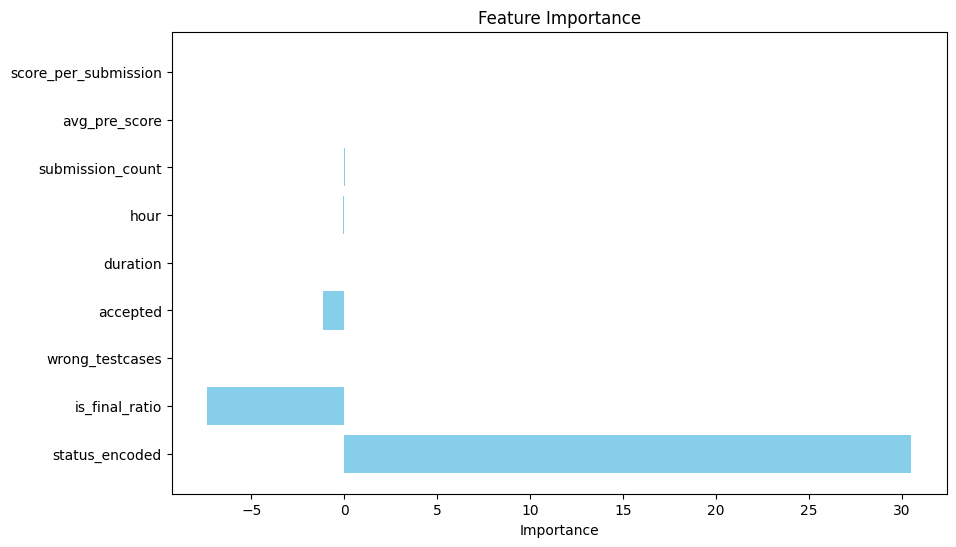

In [61]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_tbtl.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [62]:
# In kết quả
print("Model Evaluation Results of TBTL:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TBTL:
LinearRegression: MSE=0.7650, R2=0.0269


### Predict data tbtl

In [63]:
X_predict_data_tbtl = predict_data_tbtl[features_nouser]

In [64]:
nan_columns = X_predict_data_tbtl.columns[X_predict_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [65]:
X_predict_data_tbtl = scaler.fit_transform(X_predict_data_tbtl)

In [66]:
# Dự đoán
predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_47176\3950690568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


In [67]:

output = predict_data_tbtl[['username', 'TBTL']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_tbtl.csv", index=False, header=False)

## data TH


In [68]:
# Merge dữ liệu bằng username từ annonimized và th
data_th = annonimized.merge(th, on="username", how="left")

In [69]:
data_th['TH'] = pd.to_numeric(data_th['TH'], errors='coerce')
data_th['TH'] = data_th.groupby('username')['TH'].mean().values

In [70]:
# Phân tách dữ liệu
train_test_data_th = data_th[data_th['TH'].notna()]  # Sinh viên có điểm dùng để train
predict_data_th = data_th[data_th['TH'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_th.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_th.shape[0]}")

Số lượng sinh viên có điểm (train): 753
Số lượng sinh viên cần dự đoán: 736


### Train test data th

In [71]:
X_train_test_data_th = train_test_data_th[features_nouser]
y_train_test_data_th = train_test_data_th['TH']

In [72]:
nan_columns = X_train_test_data_th.columns[X_train_test_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [73]:
#Chuẩn hóa dữ liệu
# X_train_test_data_th = scaler.fit_transform(X_train_test_data_th)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_th, y_train_test_data_th, test_size=0.3, random_state=42)

In [74]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

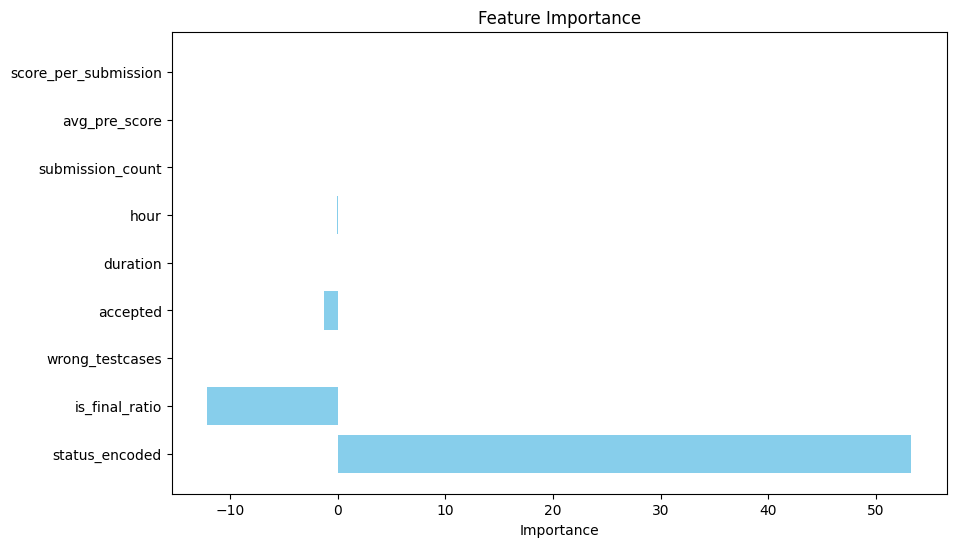

In [75]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_th.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [76]:
# In kết quả
print("Model Evaluation Results of TH:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TH:
LinearRegression: MSE=3.7233, R2=0.2539


### Predict data th

In [77]:
X_predict_data_th = predict_data_th[features_nouser]

In [78]:
nan_columns = X_predict_data_th.columns[X_predict_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [79]:
X_predict_data_th = scaler.transform(X_predict_data_th)

In [80]:
# Dự đoán
predict_data_th['TH'] = model.predict(X_predict_data_th)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_47176\1421566909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_th['TH'] = model.predict(X_predict_data_th)


In [81]:

output = predict_data_th[['username', 'TH']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_th.csv", index=False, header=False)

## data QT

In [82]:
# Merge dữ liệu bằng username từ annonimized và qt
data_qt = annonimized.merge(qt, on="username", how="left")

In [83]:
data_qt['QT'] = pd.to_numeric(data_qt['QT'], errors='coerce')
data_qt['QT'] = data_qt.groupby('username')['QT'].mean().values

In [84]:
# Phân tách dữ liệu
train_test_data_qt = data_qt[data_qt['QT'].notna()]  # Sinh viên có điểm dùng để train
predict_data_qt = data_qt[data_qt['QT'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_qt.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_qt.shape[0]}")

Số lượng sinh viên có điểm (train): 754
Số lượng sinh viên cần dự đoán: 735


### Train test data qt

In [85]:
X_train_test_data_qt = train_test_data_qt[features_nouser]
y_train_test_data_qt = train_test_data_qt['QT']

In [86]:
# fill NaN
nan_columns = X_train_test_data_qt.columns[X_train_test_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [87]:
#Chuẩn hóa dữ liệu
# X_train_test_data_qt = scaler.fit_transform(X_train_test_data_qt)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_qt, y_train_test_data_qt, test_size=0.3, random_state=42)

In [88]:
# Huấn luyện và đánh giá mô hình

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

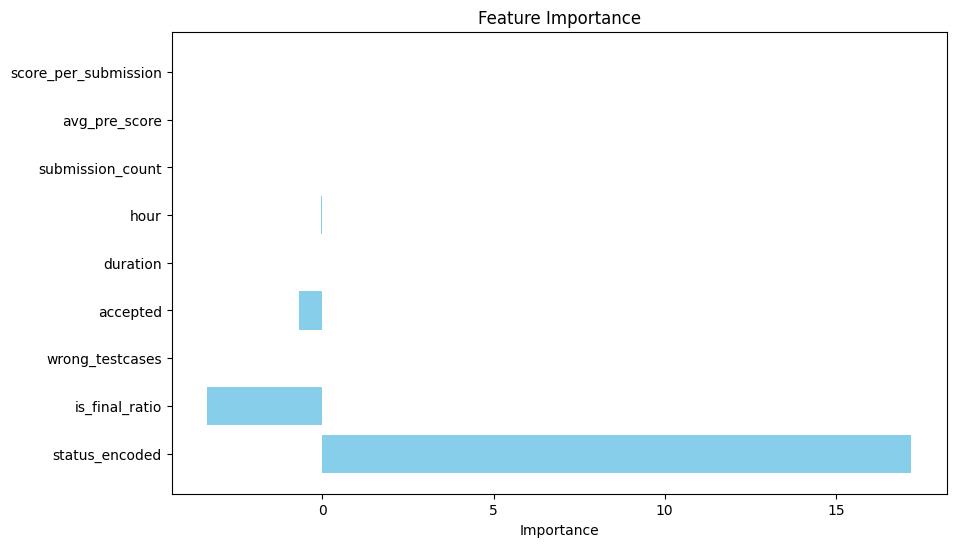

In [89]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_qt.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [90]:
# In kết quả
print("Model Evaluation Results of QT:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of QT:
LinearRegression: MSE=2.3519, R2=0.0053


### Predict data qt

In [91]:
X_predict_data_qt = predict_data_qt[features_nouser]

In [92]:
nan_columns = X_predict_data_qt.columns[X_predict_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [93]:
X_predict_data_qt = scaler.transform(X_predict_data_qt)

In [94]:
# Dự đoán
predict_data_qt['QT'] = model.predict(X_predict_data_qt)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_47176\3031361918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_qt['QT'] = model.predict(X_predict_data_qt)


In [95]:

output = predict_data_qt[['username', 'QT']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_qt.csv", index=False, header=False)

## data CK

In [96]:
# Merge dữ liệu bằng username từ annonimized và ck
data_CK = annonimized.merge(CK, on="username", how="left")

In [97]:
data_CK['CK'] = data_CK.groupby('username')['CK'].mean().values

In [98]:
# Phân tách dữ liệu
train_test_data_ck = data_CK[data_CK['CK'].notna()]  # Sinh viên có điểm dùng để train
predict_data_ck = data_CK[data_CK['CK'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_ck.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_ck.shape[0]}")

Số lượng sinh viên có điểm (train): 755
Số lượng sinh viên cần dự đoán: 734


### Train test data ck

In [99]:
X_train_test_data_ck = train_test_data_ck[features_nouser]
y_train_test_data_ck = train_test_data_ck['CK']

In [100]:
nan_columns = X_train_test_data_ck.columns[X_train_test_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [101]:
#Chuẩn hóa dữ liệu
# X_train_test_data_ck = scaler.fit_transform(X_train_test_data_ck)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_ck, y_train_test_data_ck, test_size=0.3, random_state=42)

In [102]:
# Huấn luyện và đánh giá mô hình
metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

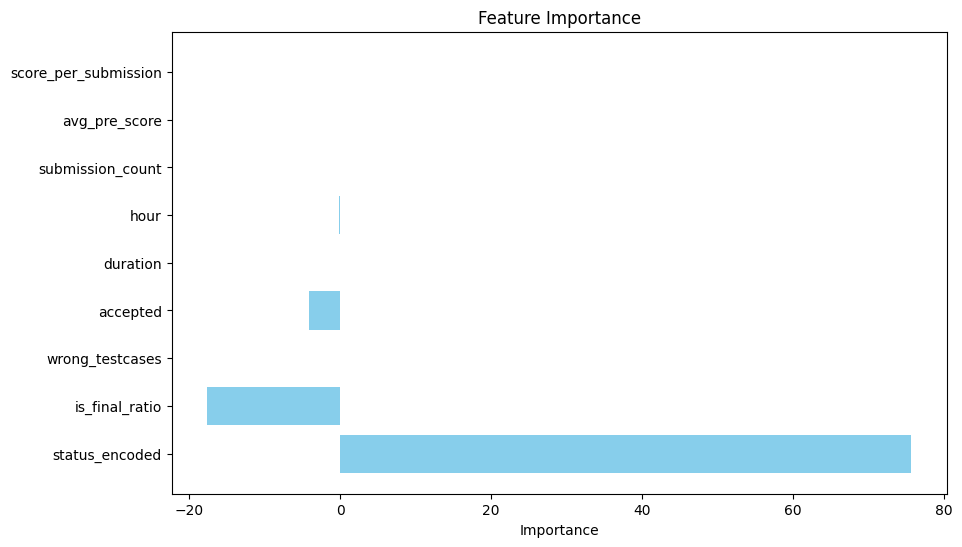

In [103]:
# Mức độ quan trọng của các đặc trưng
importances = model.coef_
features = X_train_test_data_ck.columns

# Vẽ biểu đồ mức độ quan trọng
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [104]:
# In kết quả
print("Model Evaluation Results of CK:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of CK:
LinearRegression: MSE=3.7915, R2=0.1775


### Predict data ck

In [105]:
X_predict_data_ck = predict_data_ck[features_nouser]

In [106]:
nan_columns = X_predict_data_ck.columns[X_predict_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [107]:
X_predict_data_ck = scaler.transform(X_predict_data_ck)

In [108]:
# Dự đoán
predict_data_ck['CK'] = model.predict(X_predict_data_ck)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_47176\3428818030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_ck['CK'] = model.predict(X_predict_data_ck)


In [109]:

output = predict_data_ck[['username', 'CK']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_ck.csv", index=False, header=False)